### 1. درآمد خانوارهای شهری و روستایی استان چهارمحال و. بختیاری

In [24]:
import numpy as np
import pandas as pd

In [25]:
def get_total_job_income(df, address):
    return df[df['Address'] == address]['netincome_w_y'].apply(to_int).sum()


def get_total_free_income(df, address):
    return df[df['Address'] == address]['income_s_y'].apply(to_int).sum()


def to_int(num):
    try:
        if type(num) == str:
            num = num.strip()
        return int(num)
    except Exception as e:
        return 0


def get_total_other_income(record):
    total_income = 0

    total_income += to_int(record['income_pension'])
    total_income += to_int(record['income_rent'])
    total_income += to_int(record['income_interest'])
    total_income += to_int(record['income_aid'])
    total_income += to_int(record['income_resale'])
    total_income += to_int(record['income_transfer'])

    return total_income


def get_total_subsidy_income(df, address):
    return df[df['Address'] == address]['subsidy'].apply(to_int).sum()


def get_total_income(df, address):
    return df[df['Address'] == address]['income'].apply(to_int).sum()


def calc_total_family_income(file_name):
    df_job_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S01')

    df_job_income['income'] = df_job_income.apply(lambda r: get_total_job_income(df_job_income, r['Address']), axis=1)
    df_job_income.drop_duplicates(subset=['Address'], inplace=True)
    df_job_income = df_job_income[['Address', 'income']]

    df_free_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S02')

    df_free_income['income'] = df_free_income.apply(lambda r: get_total_free_income(df_free_income, r['Address']), axis=1)
    df_free_income.drop_duplicates(subset=['Address'], inplace=True)
    df_free_income = df_free_income[['Address', 'income']]

    df_other_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S03')

    df_other_income.fillna(0, inplace=True)
    df_other_income['income'] = df_other_income.apply(lambda r: get_total_other_income(r), axis=1)
    df_other_income.drop_duplicates(subset=['Address'], inplace=True)
    df_other_income = df_other_income[['Address', 'income']]

    df_subsidy_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S04')

    df_subsidy_income['income'] = df_subsidy_income.apply(lambda r: get_total_subsidy_income(df_subsidy_income, r['Address']), axis=1)
    df_subsidy_income.drop_duplicates(subset=['Address'], inplace=True)
    df_subsidy_income = df_subsidy_income[['Address', 'income']]

    df_income = pd.concat([df_job_income, df_free_income, df_other_income, df_subsidy_income])
    df_income['income'] = df_income.apply(lambda r: get_total_income(df_income, r['Address']), axis=1)
    df_income.drop_duplicates(subset=['Address'], inplace=True)

    df_Data = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'Data')

    df_Data = df_Data[df_Data['province'] == 'CharmahalBakhtiari']
    df_Data = df_Data.merge(df_income, on='Address')

    return df_Data


In [26]:
R98_income = calc_total_family_income('R98.xlsx')
R98_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,21401545208,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,162420000
1,21401545211,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,306190000
2,21401545214,5,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,15.0,CharmahalBakhtiari,1,126920000
3,21401545217,5,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,28120000
4,21401545220,5,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,21.0,CharmahalBakhtiari,1,39000000


In [28]:
R99_income = calc_total_family_income('R99.xlsx')
R99_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,21401545215,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,125570000
1,21401545217,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,36110000
2,21401545221,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,56990000
3,21401545223,6,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,147290000
4,21401545226,5,2,132.595155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,218310000


In [29]:
R1400_income = calc_total_family_income('R1400.xlsx')
R1400_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,21401545221,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,118760000
1,21401545223,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,217920000
2,21401545225,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,624400000
3,21401545226,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,650805000
4,21401545232,2,132,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,CharmahalBakhtiari,1,402250000


In [30]:
R1401_income = calc_total_family_income('R1401.xlsx')
R1401_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,21402545926,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,667080000
1,21402545929,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,492080000
2,21402545932,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,981600000
3,21402545935,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,706400000
4,21402545938,1,191.409659,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,2,423740000


In [31]:
U98_income = calc_total_family_income('U98.xlsx')
U98_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,11401171708,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,303760000
1,11401171711,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,594960018
2,11401171714,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,294995009
3,11401171717,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,185460000
4,11401171720,11,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,296380000


In [32]:
U99_income = calc_total_family_income('U99.xlsx')
U99_income.head()

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,11401171714,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,421390000
1,11401171717,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,251130000
2,11401171720,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,CharmahalBakhtiari,1,388380000
3,11401171726,11,4,328.919621,1,2,NaN,2.0,NaN,1.0,NaN,NaN,NaN,55.0,27.0,1.0,2.0,CharmahalBakhtiari,1,58380000
4,11401171729,11,4,328.919621,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,CharmahalBakhtiari,1,722730000


In [33]:
U1400_income = calc_total_family_income('U1400.xlsx')
U1400_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,IsTel,FVam,province,town,income
0,11401171720,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,1023180000
1,11401171723,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,CharmahalBakhtiari,1,683740000
2,11401171727,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,64360000
3,11401171729,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,922640000
4,11401171732,4,282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,CharmahalBakhtiari,1,217860000


In [34]:
U1401_income = calc_total_family_income('U1401.xlsx')
U1401_income.head()

,Address,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,BlkAbdJaygozin,RadifJaygozin,province,town,income
0,11401171826,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,1799010000
1,11401171829,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,455780000
2,11401171832,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,105080000
3,11401171838,1,348.310329,1,2,,,3,1,,,15.0,39.0,CharmahalBakhtiari,1,402680000
4,11401171841,1,348.310329,1,1,,,,,,,NaN,NaN,CharmahalBakhtiari,1,545445000


### مقایسه درآمد خانوارهای روستایی و شهری در سال 1398


In [35]:
R98_income['income'].mean(), U98_income['income'].mean()

(257892684.6371308, 356801201.8595679)

In [36]:
R98_income['income'].std(), U98_income['income'].std()

(187244744.10251424, 273958709.03271013)

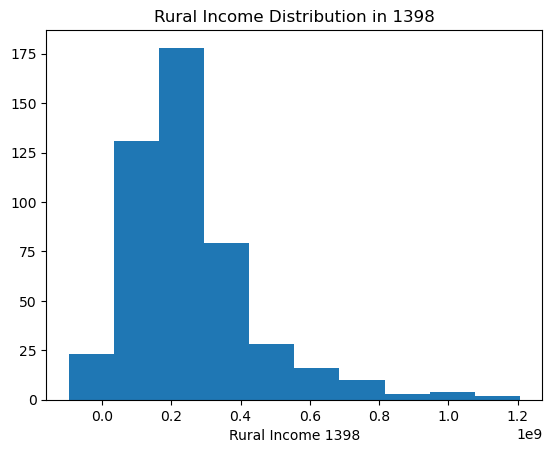

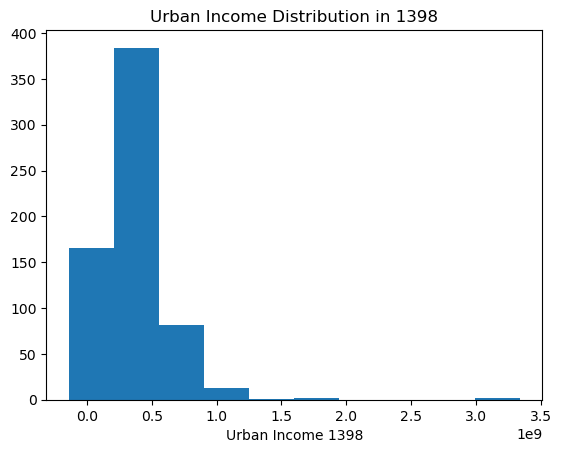

In [37]:
import matplotlib.pyplot as plt

plt.hist(R98_income['income'])
plt.xlabel('Rural Income 1398')
plt.title('Rural Income Distribution in 1398')
plt.show()
plt.hist(U98_income['income'])
plt.xlabel('Urban Income 1398')
plt.title('Urban Income Distribution in 1398')
plt.show()

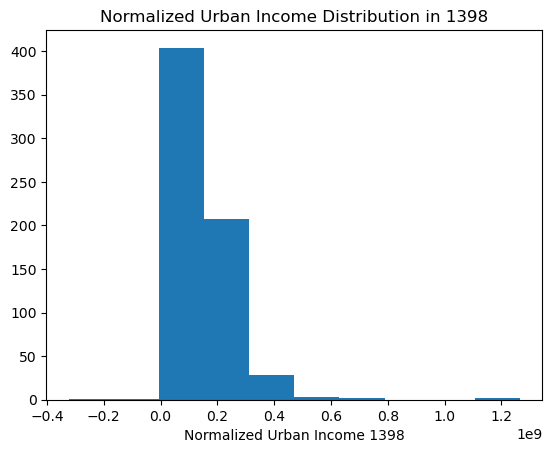

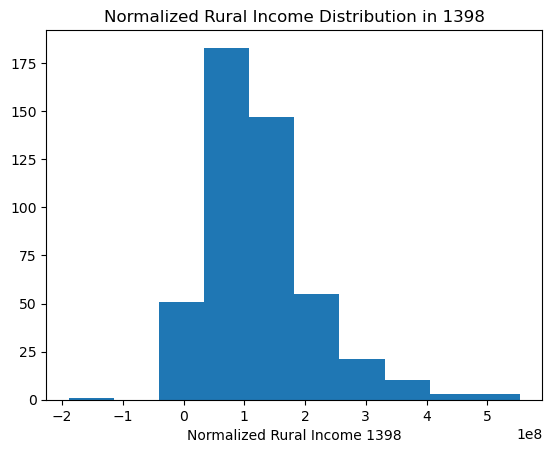

In [38]:
from scipy import stats

R98_income_normal, _ = stats.yeojohnson(R98_income['income'])
U98_income_normal, _ = stats.yeojohnson(U98_income['income'])

plt.hist(U98_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1398')
plt.title('Normalized Urban Income Distribution in 1398')
plt.show()
plt.hist(R98_income_normal, bins=10)
plt.xlabel('Normalized Rural Income 1398')
plt.title('Normalized Rural Income Distribution in 1398')
plt.show()

In [39]:
from scipy.stats import shapiro

shapiro(U98_income_normal), shapiro(R98_income_normal)

(ShapiroResult(statistic=0.7486673894821306, pvalue=3.336298026568317e-30),
 ShapiroResult(statistic=0.8894706266981037, pvalue=5.8633726961676786e-18))

چون مقدار متغیر پی از 0.05 کمتر شده است در نتیجه فرض ما مبنی بر نرمال بودن داده ها رد می شود
در نتیجه داده ها همچنان غیر نرمال هستند و از تست دیگری استفاده می کنیم.
از آنجایی که داده ها دارای اندازه گیری ترتیبی نیستند و همچنین داده ها از دو جمعیت جدا هستند بنابراین نمی توان از تست یو استفاده کرد و بهتر است از روش زیر استفاده کنیم

In [73]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(U98_income['income'], R98_income['income'])
u_stat, p_value

(197703.5, 1.863645837108539e-16)

نتیجه می شود میانگین درآمدهای خانوارهای شهری و روستایی در سال 1398 با یکدیگر برابر نیست زیرا مقدار متغیر پی از 0.05 کمتر است
بنابراین فرض اولیه باطل شده و نتیجه می شود میانگین ها یکی نیستند

### مقایسه درآمد خانوارهای شهری و روستایی سال 1399

In [41]:
R99_income['income'].mean(), U99_income['income'].mean()

(385434775.8343685, 490428508.240566)

In [42]:
R99_income['income'].std(), U99_income['income'].std()

(274244684.6791777, 325189937.6262645)

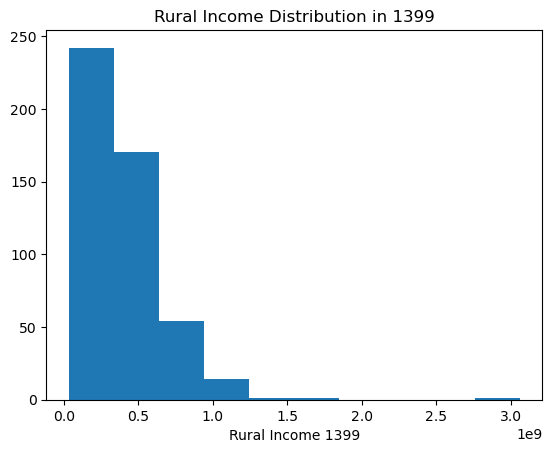

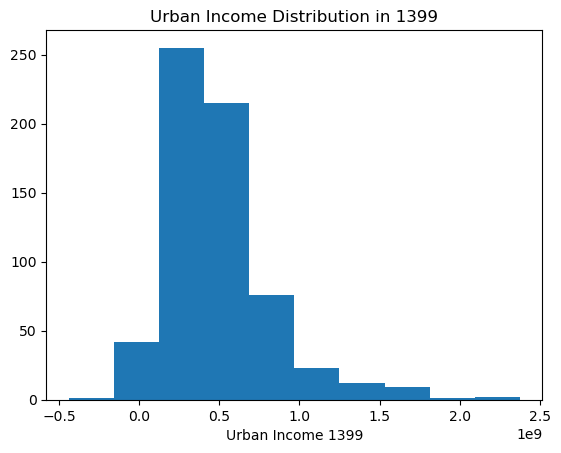

In [44]:
plt.hist(R99_income['income'])
plt.xlabel('Rural Income 1399')
plt.title('Rural Income Distribution in 1399')
plt.show()
plt.hist(U99_income['income'])
plt.xlabel('Urban Income 1399')
plt.title('Urban Income Distribution in 1399')
plt.show()

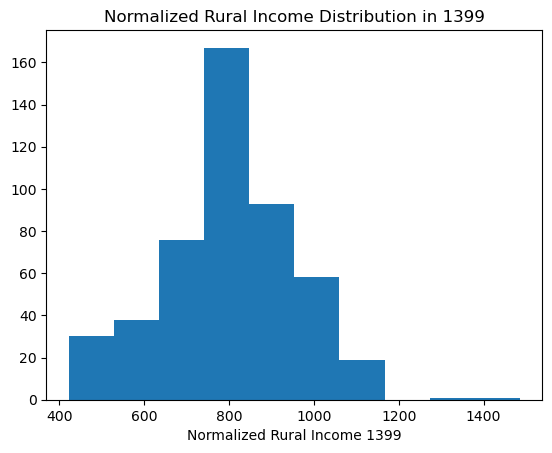

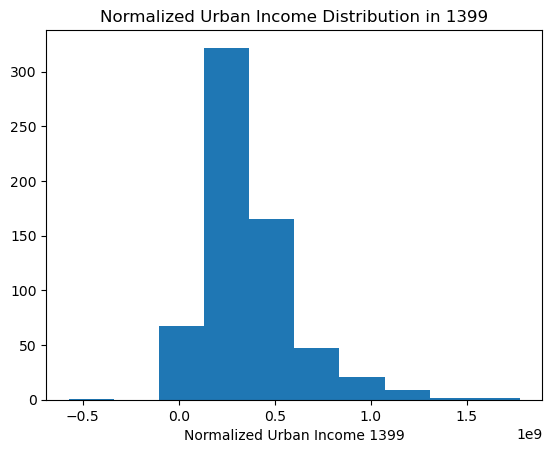

In [45]:
R99_income_normal, _ = stats.yeojohnson(R99_income['income'])
U99_income_normal, _ = stats.yeojohnson(U99_income['income'])

plt.hist(R99_income_normal, bins=10)
plt.xlabel('Normalized Rural Income 1399')
plt.title('Normalized Rural Income Distribution in 1399')
plt.show()
plt.hist(U99_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1399')
plt.title('Normalized Urban Income Distribution in 1399')
plt.show()

In [46]:
shapiro(U99_income_normal), shapiro(R99_income_normal)

(ShapiroResult(statistic=0.8737341892978437, pvalue=2.8069592380092213e-22),
 ShapiroResult(statistic=0.9870688231383097, pvalue=0.00027640764662027154))

چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم. مشابه استدلال قسمت قبلی از تست 

In [47]:
u_stat, p_value = mannwhitneyu(U99_income['income'], R99_income['income'])
u_stat, p_value

(188167.0, 1.0701416608397421e-10)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در سال 1399 نیز درآمد شهری ها و روستایی ها برابر نمی باشد

### مقایسه درآمد خانوارهای روستایی و شهری سال 1400

In [48]:
R1400_income['income'].mean(), U1400_income['income'].mean()

(569582833.5050917, 746060831.7096775)

In [49]:
R1400_income['income'].std(), U1400_income['income'].std()

(402311781.486489, 530935148.2879168)

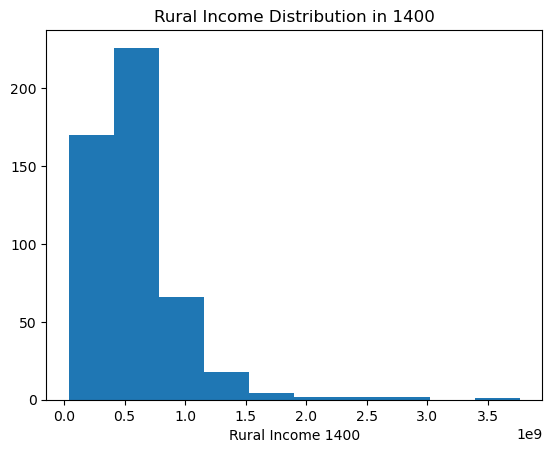

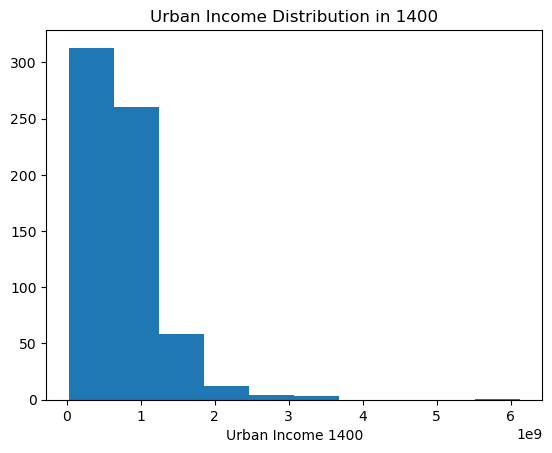

In [50]:
plt.hist(R1400_income['income'])
plt.xlabel('Rural Income 1400')
plt.title('Rural Income Distribution in 1400')
plt.show()
plt.hist(U1400_income['income'])
plt.xlabel('Urban Income 1400')
plt.title('Urban Income Distribution in 1400')
plt.show()

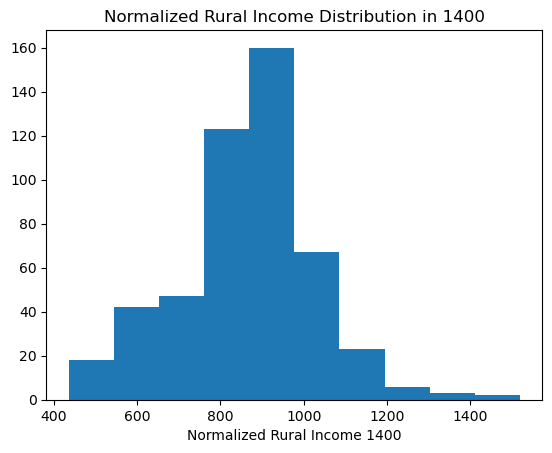

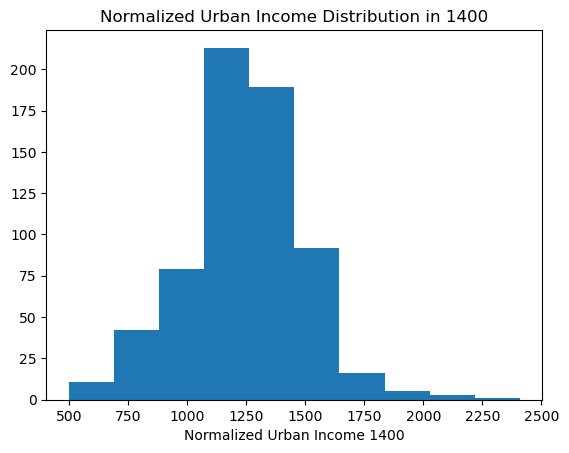

In [51]:
R1400_income_normal, _ = stats.yeojohnson(R1400_income['income'])
U1400_income_normal, _ = stats.yeojohnson(U1400_income['income'])

plt.hist(R1400_income_normal, bins=10)
plt.xlabel('Normalized Rural Income 1400')
plt.title('Normalized Rural Income Distribution in 1400')
plt.show()
plt.hist(U1400_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1400')
plt.title('Normalized Urban Income Distribution in 1400')
plt.show()

In [52]:
shapiro(U1400_income_normal), shapiro(R1400_income_normal)

(ShapiroResult(statistic=0.9830343972201561, pvalue=7.327970703303551e-07),
 ShapiroResult(statistic=0.9818424180889902, pvalue=8.268094606754816e-06))

در دو نمودار بالا ظاهر داده ها نرمال نشان داده شده است اما استفاده از تست های آماری نشان می دهد که این امر حقیقت ندارد
چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم.

In [53]:
u_stat, p_value = mannwhitneyu(U1400_income['income'], R1400_income['income'])
u_stat, p_value

(198409.5, 2.681240350131669e-12)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در سال 1400 نیز درآمد شهری ها و روستایی ها برابر نمی باشد

### مقایسه درآمد خانوارهای شهری و روستایی سال 1401

In [54]:
R1401_income['income'].mean(), U1401_income['income'].mean()

(976059270.258727, 1217953281.0700152)

In [55]:
R1401_income['income'].std(), U1401_income['income'].std()

(649968260.2637795, 735230009.5400902)

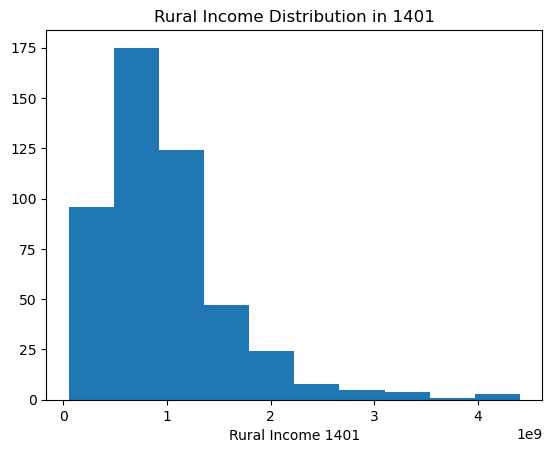

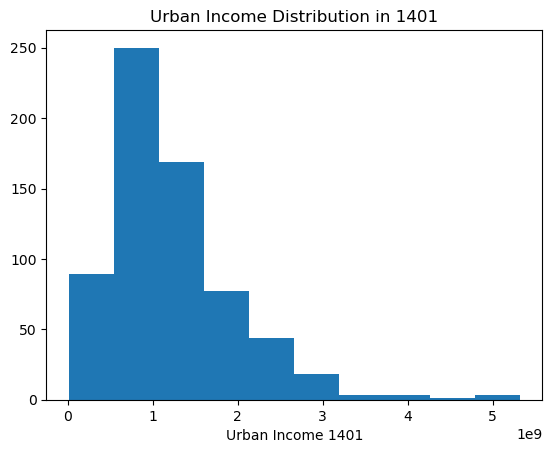

In [56]:
plt.hist(R1401_income['income'])
plt.xlabel('Rural Income 1401')
plt.title('Rural Income Distribution in 1401')
plt.show()
plt.hist(U1401_income['income'])
plt.xlabel('Urban Income 1401')
plt.title('Urban Income Distribution in 1401')
plt.show()

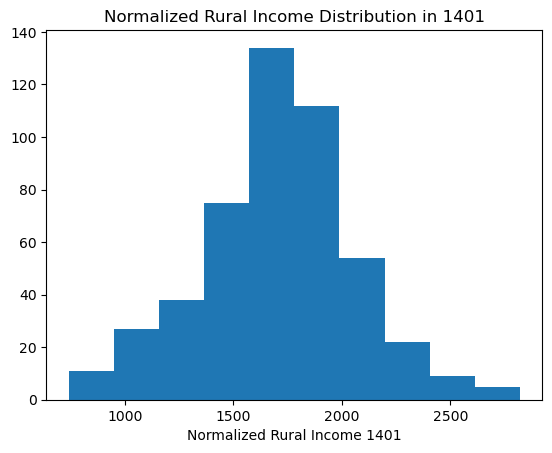

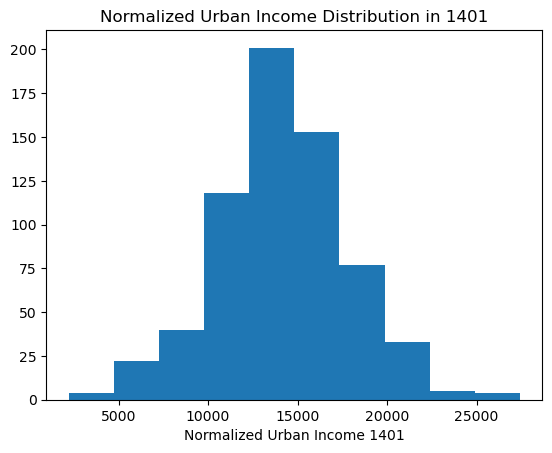

In [57]:
R1401_income_normal, _ = stats.yeojohnson(R1401_income['income'])
U1401_income_normal, _ = stats.yeojohnson(U1401_income['income'])

plt.hist(R1401_income_normal, bins=10)
plt.xlabel('Normalized Rural Income 1401')
plt.title('Normalized Rural Income Distribution in 1401')
plt.show()
plt.hist(U1401_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1401')
plt.title('Normalized Urban Income Distribution in 1401')
plt.show()

In [58]:
shapiro(U1401_income_normal), shapiro(R1401_income_normal)

(ShapiroResult(statistic=0.9912508353046431, pvalue=0.0006259307752805592),
 ShapiroResult(statistic=0.9910081670633774, pvalue=0.0046538271252705))

چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم.

In [59]:
u_stat, p_value = mannwhitneyu(U1401_income['income'], R1401_income['income'])
u_stat, p_value

(195839.0, 8.588582499822181e-11)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در سال 1401 نیز درآمد شهری ها و روستایی ها برابر نمی باشد

### مقایسه درآمد خانوارهای شهری و روستایی استان چهار محال و بختیاری در مجموع سالهای گذشته

In [61]:
R_income = pd.concat([R98_income, R99_income, R1400_income, R1401_income])
R_income

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income,IsTel,FVam
0,21401545208,5.0,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,162420000,NaN,NaN
1,21401545211,5.0,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,306190000,NaN,NaN
2,21401545214,5.0,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,15.0,CharmahalBakhtiari,1,126920000,NaN,NaN
3,21401545217,5.0,2,132.659492,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,28120000,NaN,NaN
4,21401545220,5.0,2,132.659492,1,2,NaN,1.0,NaN,1.0,NaN,NaN,NaN,211391.0,21.0,CharmahalBakhtiari,1,39000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,21409553726,NaN,3,116.221112,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,771720000,NaN,NaN
483,21409553729,NaN,3,116.221112,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,771980000,NaN,NaN
484,21409553732,NaN,3,116.221112,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,1288740000,NaN,NaN
485,21409553735,NaN,3,116.221112,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,225440000,NaN,NaN


In [64]:
U_income = pd.concat([U98_income, U99_income, U1400_income, U1401_income])
U_income

,Address,MahMorajeh,Fasl,weight,khanevartype,Takmil,TakmilDescA,TakmilDescB,TakmilDescC,Jaygozin,JaygozinDescA,JaygozinDescB,JaygozinDescC,BlkAbdJaygozin,RadifJaygozin,province,town,income,IsTel,FVam
0,11401171708,11.0,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,303760000,NaN,NaN
1,11401171711,11.0,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,594960018,NaN,NaN
2,11401171714,11.0,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,294995009,NaN,NaN
3,11401171717,11.0,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,185460000,NaN,NaN
4,11401171720,11.0,4,266.339013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CharmahalBakhtiari,1,296380000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,11404179528,NaN,2,267.822168,1,2,1,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,4,1367700000,NaN,NaN
653,11409183532,NaN,2,159.760632,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,960185000,NaN,NaN
654,11409183535,NaN,2,159.760632,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,692315000,NaN,NaN
655,11409183538,NaN,2,159.760632,1,1,,,,,,,NaN,NaN,NaN,CharmahalBakhtiari,9,817315000,NaN,NaN


In [66]:
R_income['income'].mean(), U_income['income'].mean()

(549567010.3943152, 705632954.1481482)

In [67]:
R_income['income'].std(), U_income['income'].std()

(497966593.1113643, 600836719.0268217)

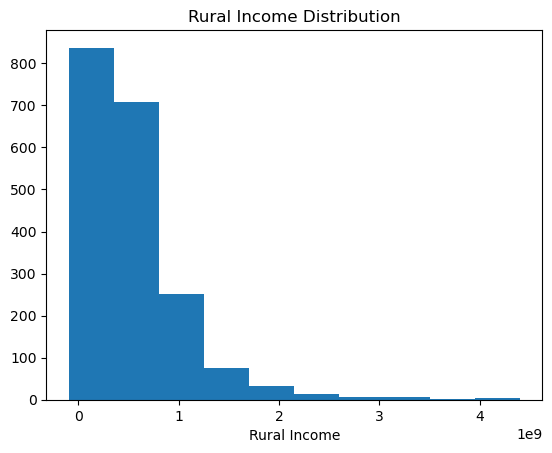

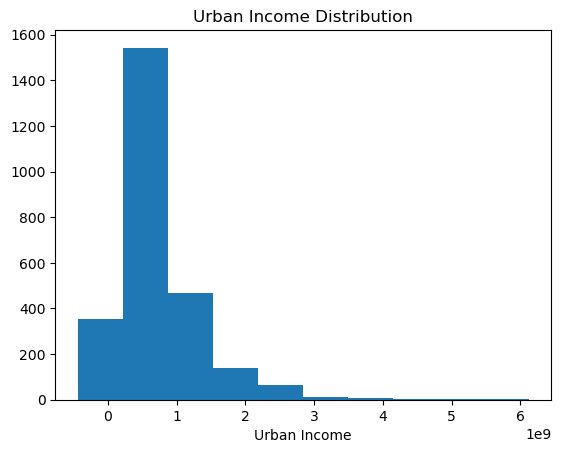

In [68]:
plt.hist(R_income['income'])
plt.xlabel('Rural Income')
plt.title('Rural Income Distribution')
plt.show()

plt.hist(U_income['income'])
plt.xlabel('Urban Income')
plt.title('Urban Income Distribution')
plt.show()

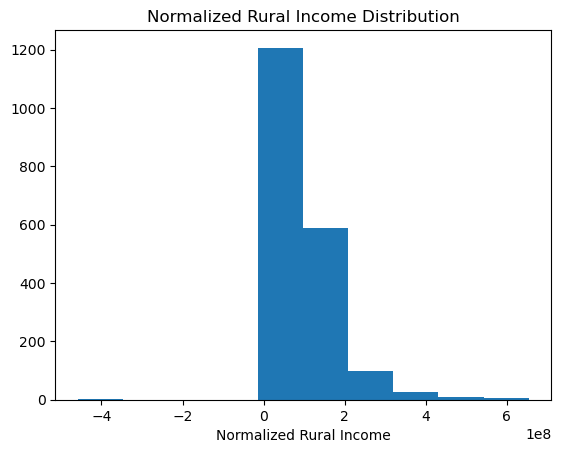

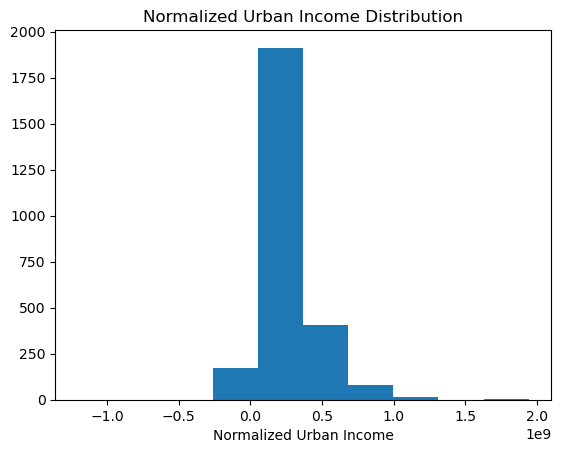

In [69]:
R_income_normal, _ = stats.yeojohnson(R_income['income'])
U_income_normal, _ = stats.yeojohnson(U_income['income'])

plt.hist(R_income_normal, bins=10)
plt.xlabel('Normalized Rural Income')
plt.title('Normalized Rural Income Distribution')
plt.show()
plt.hist(U_income_normal, bins=10)
plt.xlabel('Normalized Urban Income')
plt.title('Normalized Urban Income Distribution')
plt.show()

In [70]:
shapiro(U_income_normal), shapiro(R_income_normal)

(ShapiroResult(statistic=0.8258956773947564, pvalue=1.2658224483427884e-46),
 ShapiroResult(statistic=0.8190708548295484, pvalue=3.2834725777591776e-42))

چون مقدار متغیر پی بسیار کمتر از 0.05 است پس میتوان فرض نرمال شدن داده ها را رد کرده و نتیجه گرفت که داده ها نرمال نیستند یا به عبارتی هنوز نرمال نشده اند
بنابراین از تست آماری دیگری استفاده می کنیم.

In [71]:
u_stat, p_value = mannwhitneyu(U_income['income'], R_income['income'])
u_stat, p_value

(2968706.5, 3.120117705094212e-26)

اینجا نیز با کوچکتر بودن مقدار متغیر پی نسبت به 0.05 فرض برابری درآمدها نقض شده و نتیجه میگیریم که در مجموع سالهای گذشته درآمد افراد روستایی و شهری برابر نمی باشد